# Loading dataset

In [3]:
import pandas as pd

# Load trader data
trader_df = pd.read_csv("C:\\Users\\hp\\Dropbox\\PC\\Desktop\\historical_data.csv")

# Load fear/greed sentiment data
sentiment_df = pd.read_csv("C:\\Users\\hp\\Dropbox\\PC\\Desktop\\fear_greed_index.csv")

In [4]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


# Preprocessing of trader dataset

Checking for datatypes

In [6]:
print("\nColumn Data Types:")
print(trader_df.dtypes)


Column Data Types:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


CHECKING FOR MISSING VALUES

In [7]:
print("\nMissing Values in Trader Data:")
print(trader_df.isnull().sum())


Missing Values in Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


UNIQUE VALUES IN KEY COLUMNS

In [9]:
print("\n Unique Values in Key Columns:")
for col in ['Side', 'Coin', 'Direction']:  
    if col in trader_df.columns:
        unique_vals = trader_df[col].dropna().unique().tolist()
        print(f"- {col} ({len(unique_vals)} unique): {unique_vals}")


 Unique Values in Key Columns:
- Side (2 unique): ['BUY', 'SELL']
- Coin (246 unique): ['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL', 'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK', 'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP', 'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19', '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45', '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6', '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32', '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74', 'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR', 'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL', 'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI', 'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX', 'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON', 'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL', 'COMP', 'FARTCOIN',

CONVERTING NUMERIC COLUMNS

In [10]:
numeric_cols = [
    'Execution Price', 'Size Tokens', 'Size USD', 
    'Start Position', 'Closed PnL', 'Fee', 
    'Trade ID', 'Timestamp'
]

for col in numeric_cols:
    if col in trader_df.columns:
        trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')

CONVERTING BOOLEAN COLUMN

In [11]:
if 'Crossed' in trader_df.columns:
    trader_df['Crossed'] = trader_df['Crossed'].astype(bool)

CONVERTING ORDER ID TO STRING

In [12]:
if 'Order ID' in trader_df.columns:
    trader_df['Order ID'] = trader_df['Order ID'].astype(str)

CONVERTING TIMESTAMP COLUMNS

In [13]:
if 'Timestamp IST' in trader_df.columns:
    trader_df['Timestamp IST'] = pd.to_datetime(
        trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce'
    )

In [14]:
if 'Timestamp' in trader_df.columns:
    trader_df['Timestamp_parsed'] = pd.to_datetime(
        trader_df['Timestamp'], unit='s', errors='coerce'
    )

In [16]:
print("Sample values from 'Timestamp' column:")
print(trader_df['Timestamp'].head(10))

print("\nMinimum and Maximum:")
print(trader_df['Timestamp'].min(), trader_df['Timestamp'].max())

Sample values from 'Timestamp' column:
0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64

Minimum and Maximum:
1680000000000.0 1750000000000.0


Converting from milliseconds to datetime

In [17]:
trader_df['Timestamp_parsed'] = pd.to_datetime(
    trader_df['Timestamp'], unit='ms', errors='coerce'
)

In [18]:
print(trader_df[['Timestamp', 'Timestamp_parsed']].head())
print("\nMissing parsed timestamps:", trader_df['Timestamp_parsed'].isnull().sum())
print("\nDate range:", trader_df['Timestamp_parsed'].min(), "→", trader_df['Timestamp_parsed'].max())

      Timestamp    Timestamp_parsed
0  1.730000e+12 2024-10-27 03:33:20
1  1.730000e+12 2024-10-27 03:33:20
2  1.730000e+12 2024-10-27 03:33:20
3  1.730000e+12 2024-10-27 03:33:20
4  1.730000e+12 2024-10-27 03:33:20

Missing parsed timestamps: 0

Date range: 2023-03-28 10:40:00 → 2025-06-15 15:06:40


CLEANED TRADER DATASET

In [19]:
print("\n Cleaned Data Types:\n")
print(trader_df.dtypes)

print("\n Missing Values After Cleaning:\n")
print(trader_df.isnull().sum())

print("\n Sample of parsed timestamps:")
print(trader_df[['Timestamp IST', 'Timestamp_parsed']].head())


 Cleaned Data Types:

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST       datetime64[ns]
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                    object
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
Timestamp_parsed    datetime64[ns]
dtype: object

 Missing Values After Cleaning:

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Time

# Preprocessing of Sentiment dataset

CHECKING FOR NULL VALUES

In [20]:
print("\nMissing Values in Fear Greed Data:")
print(sentiment_df.isnull().sum())


Missing Values in Fear Greed Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


CONVERTING TIMESTAMP TO DATETIME

In [22]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['timestamp'], unit='s')

NORMALIZING THE CLASSIFICATION COLUMN

In [23]:
sentiment_df['classification'] = sentiment_df['classification'].str.strip().str.title()

KEEPING ONLY NECESSARY COLUMNS

In [24]:
sentiment_df = sentiment_df[['Date', 'value', 'classification']]

EXTRACTING JUST THE DATE FOR MERGING

In [25]:
sentiment_df['Date'] = sentiment_df['Date'].dt.date

In [26]:
print(sentiment_df.head())

         Date  value classification
0  2018-02-01     30           Fear
1  2018-02-02     15   Extreme Fear
2  2018-02-03     40           Fear
3  2018-02-04     24   Extreme Fear
4  2018-02-05     11   Extreme Fear


# Merging both datasets

In [30]:
# Convert 'Date' column to datetime format
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], errors='coerce')

# Now extract only the date part
sentiment_df['date_only'] = sentiment_df['Date'].dt.date


In [31]:
trader_df['date_only'] = trader_df['Timestamp_parsed'].dt.date

merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only', 'classification']],
    on='date_only',
    how='left'
)

In [33]:
print("Rows with sentiment classification:", merged_df['classification'].notna().sum())
print("Rows without sentiment classification:", merged_df['classification'].isna().sum())


Rows with sentiment classification: 184263
Rows without sentiment classification: 26961


# Exploratory Data Analysis (EDA)

TOTAL TRADE IN FEAR VS GREED

In [36]:
print(merged_df['classification'].value_counts())

classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


PnL COMPARISON

In [38]:
print(merged_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Timestamp_parsed', 'date_only', 'classification'],
      dtype='object')


In [39]:
merged_df.groupby('classification')['Closed PnL'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Greed,6962.0,25.418772,306.166937,-21524.40000,0.0,0.0,16.186514,2500.95750
Fear,133871.0,50.047622,909.121796,-35681.74723,0.0,0.0,6.042830,135329.09010
Greed,36289.0,87.894859,1148.343968,-117990.10410,0.0,0.0,9.239366,44223.45187
Neutral,7141.0,22.229713,633.704815,-18360.67007,0.0,0.0,1.950048,18282.19011


DEFINE WIN/LOSS

In [40]:
merged_df['is_win'] = merged_df['Closed PnL'] > 0

WIN RATE PER SENTIMENT

In [41]:
win_rate = merged_df.groupby('classification')['is_win'].mean()
print(win_rate)

classification
Extreme Greed    0.490089
Fear             0.415146
Greed            0.446471
Neutral          0.317182
Name: is_win, dtype: float64


TRADE DIRECTION TRENDS (BUY VS SELL)

In [44]:
merged_df.groupby(['classification', 'Side']).size().unstack()

Side,BUY,SELL
classification,,
Extreme Greed,3371,3591
Fear,66081,67790
Greed,15421,20868
Neutral,3505,3636


# VISUALIZATION 

PnL DISTRIBUTION UNDER FEARA VS GREED

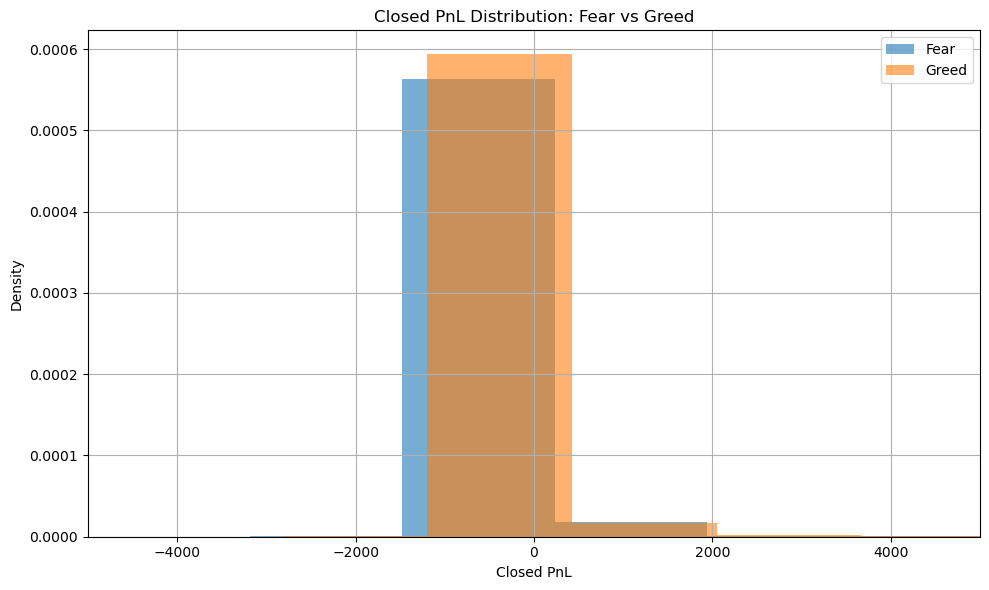

In [45]:
import matplotlib.pyplot as plt

# Filter PnL data for 'Fear' and 'Greed' classifications
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['Closed PnL']
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['Closed PnL']

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(fear_pnl, bins=100, alpha=0.6, label='Fear', density=True)
plt.hist(greed_pnl, bins=100, alpha=0.6, label='Greed', density=True)
plt.xlim(-5000, 5000)  
plt.xlabel('Closed PnL')
plt.ylabel('Density')
plt.title('Closed PnL Distribution: Fear vs Greed')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


PnL DISTRIBUTION BY SENTIMENT

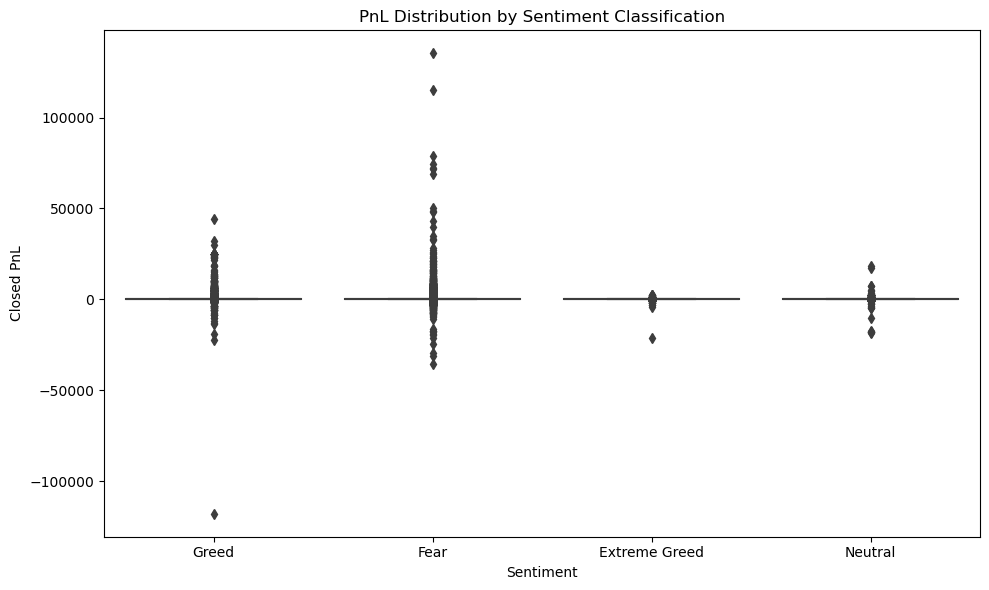

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('PnL Distribution by Sentiment Classification')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()


PnL OVER TIME BY SENTIMENT

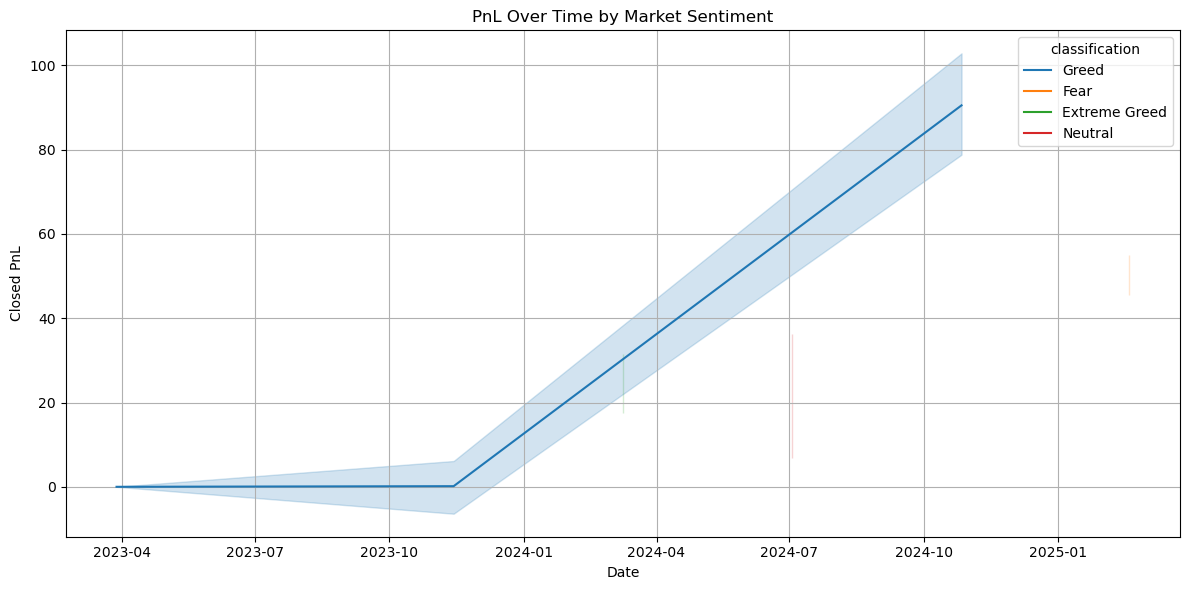

In [49]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='date_only', y='Closed PnL', hue='classification')
plt.title('PnL Over Time by Market Sentiment')
plt.xlabel('Date')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


NUMBER OF TRADES PER SENTIMENT

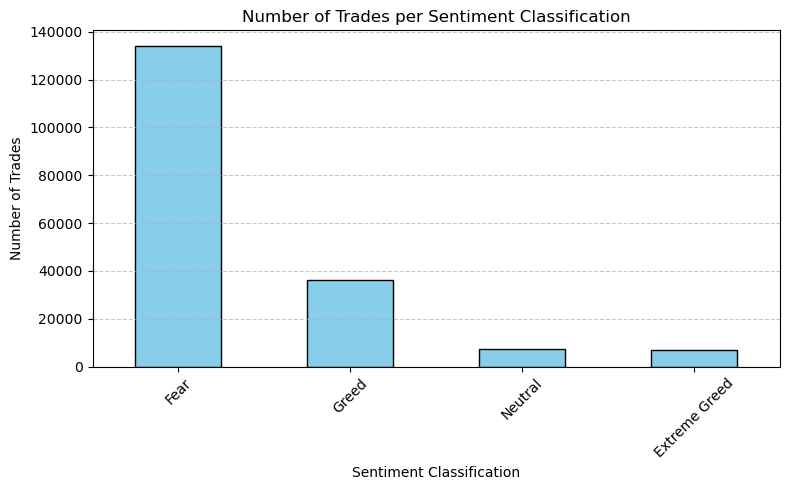

In [46]:
# Count number of trades per sentiment
trade_counts = merged_df['classification'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
trade_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Trades per Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


BUY VS SELL COMPARISON

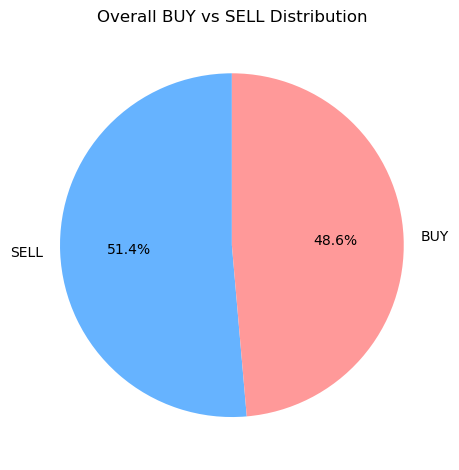

In [48]:
merged_df['Side'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Overall BUY vs SELL Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()